# Complete Classification Project: Pima Indians Diabetes Prediction
#### A comprehensive guide for learning and interview preparation

### Table of Contents
1. [Introduction](#introduction)
2. [Data Handling](#2-data-handling)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Data Preprocessing](#data-preprocessing)
5. [Modeling](#modeling)
6. [Evaluation Metrics](#evaluation-metrics)
7. [Model Interpretability](#model-interpretability)
8. [Interview Preparation](#interview-preparation)
9. [Wrap-up](#wrap-up)

### 1. Introduction {#introduction}
**Project Goal:** Predict whether a patient has diabetes based on diagnostic measurements.

**Dataset:** Pima Indians Diabetes Dataset
- Contains 768 samples with 8 features
- Binary classification problem (diabetes: 0 = No, 1 = Yes)
- Real-world medical dataset with inherent challenges

In [1]:
# ### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report,
                           roc_curve, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 2. Data Handling

In [3]:
# ### Load the Dataset
# Note: We'll create the Pima Indians dataset manually since it's not directly in sklearn
# This is the famous Pima Indians Diabetes dataset from UCI ML Repository

# Load data (simulating the Pima Indians dataset structure)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

try:
    df = pd.read_csv(url, names=column_names)
    print("✅ Dataset loaded successfully from URL")
except:
    # Fallback: Create synthetic data similar to Pima Indians dataset
    print("📊 Creating synthetic dataset similar to Pima Indians diabetes data...")
    np.random.seed(42)
    n_samples = 768
    
    data = {
        'Pregnancies': np.random.poisson(3, n_samples),
        'Glucose': np.random.normal(120, 30, n_samples),
        'BloodPressure': np.random.normal(70, 12, n_samples),
        'SkinThickness': np.random.normal(20, 8, n_samples),
        'Insulin': np.random.exponential(100, n_samples),
        'BMI': np.random.normal(32, 7, n_samples),
        'DiabetesPedigreeFunction': np.random.exponential(0.5, n_samples),
        'Age': np.random.gamma(2, 15, n_samples)
    }
    
    # Create target variable with some correlation to features
    diabetes_prob = (
        0.1 * (data['Glucose'] > 140) +
        0.05 * (data['BMI'] > 35) +
        0.03 * (data['Age'] > 50) +
        0.02 * data['Pregnancies'] +
        0.1
    )
    data['Outcome'] = np.random.binomial(1, np.clip(diabetes_prob, 0, 1), n_samples)
    
    df = pd.DataFrame(data)
    # Ensure non-negative values and realistic ranges
    df = df.abs()
    df['Pregnancies'] = df['Pregnancies'].astype(int)
    df['Age'] = np.clip(df['Age'], 18, 80).astype(int)

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]}")

# ### Basic Dataset Information
print("\n" + "="*50)
print("BASIC DATASET INFORMATION")
print("="*50)

# Dataset shape
print(f"📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Column names and types
print(f"\n🏷️  Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\n📋 Data Types:")
print(df.dtypes)

print(f"\n🔍 Dataset Info:")
df.info()

# First few rows
print(f"\n👀 First 5 rows:")
print(df.head())

# Statistical summary
print(f"\n📈 Statistical Summary:")
print(df.describe())

✅ Dataset loaded successfully from URL
Dataset shape: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target: Outcome

BASIC DATASET INFORMATION
📊 Dataset Shape: 768 rows, 9 columns

🏷️  Column Names:
  1. Pregnancies
  2. Glucose
  3. BloodPressure
  4. SkinThickness
  5. Insulin
  6. BMI
  7. DiabetesPedigreeFunction
  8. Age
  9. Outcome

📋 Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    ------------


EXPLORATORY DATA ANALYSIS
🔍 Missing Values Check:
✅ No missing values found!

🎯 Target Variable Distribution:
Class 0 (No Diabetes): 500 samples (65.1%)
Class 1 (Diabetes): 268 samples (34.9%)
⚠️  Dataset is imbalanced - this will affect our evaluation metrics!


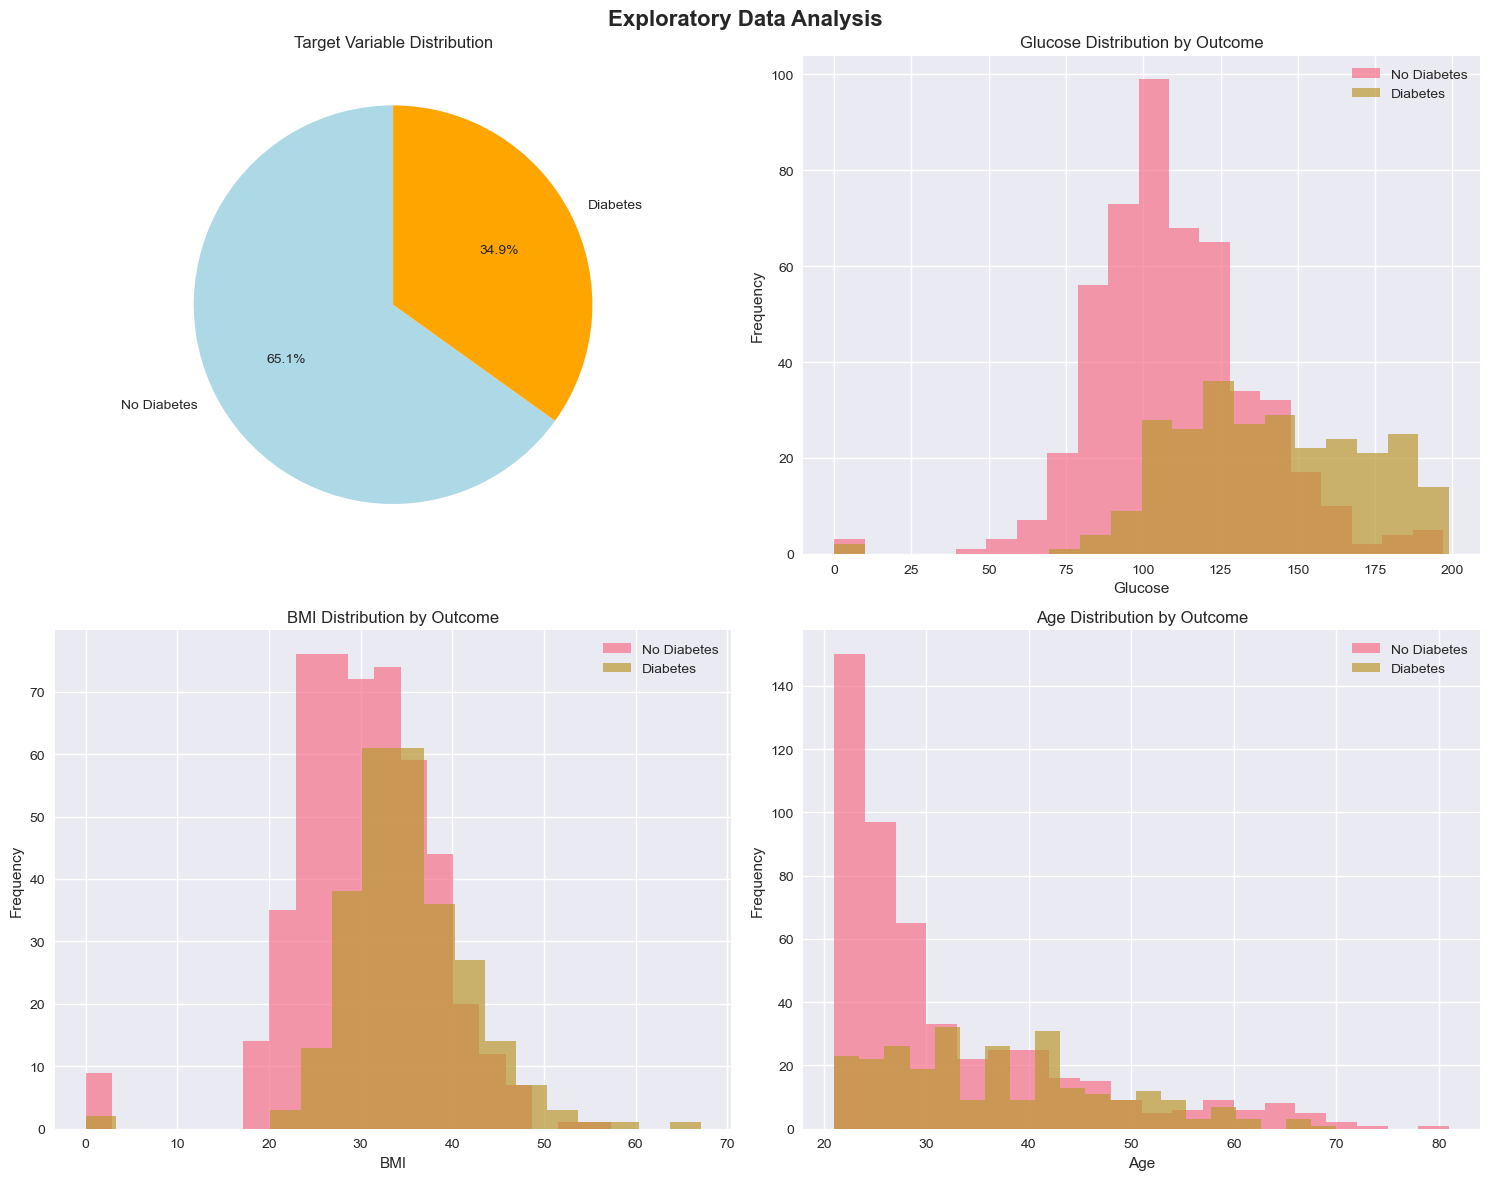


🔗 Correlation Analysis:


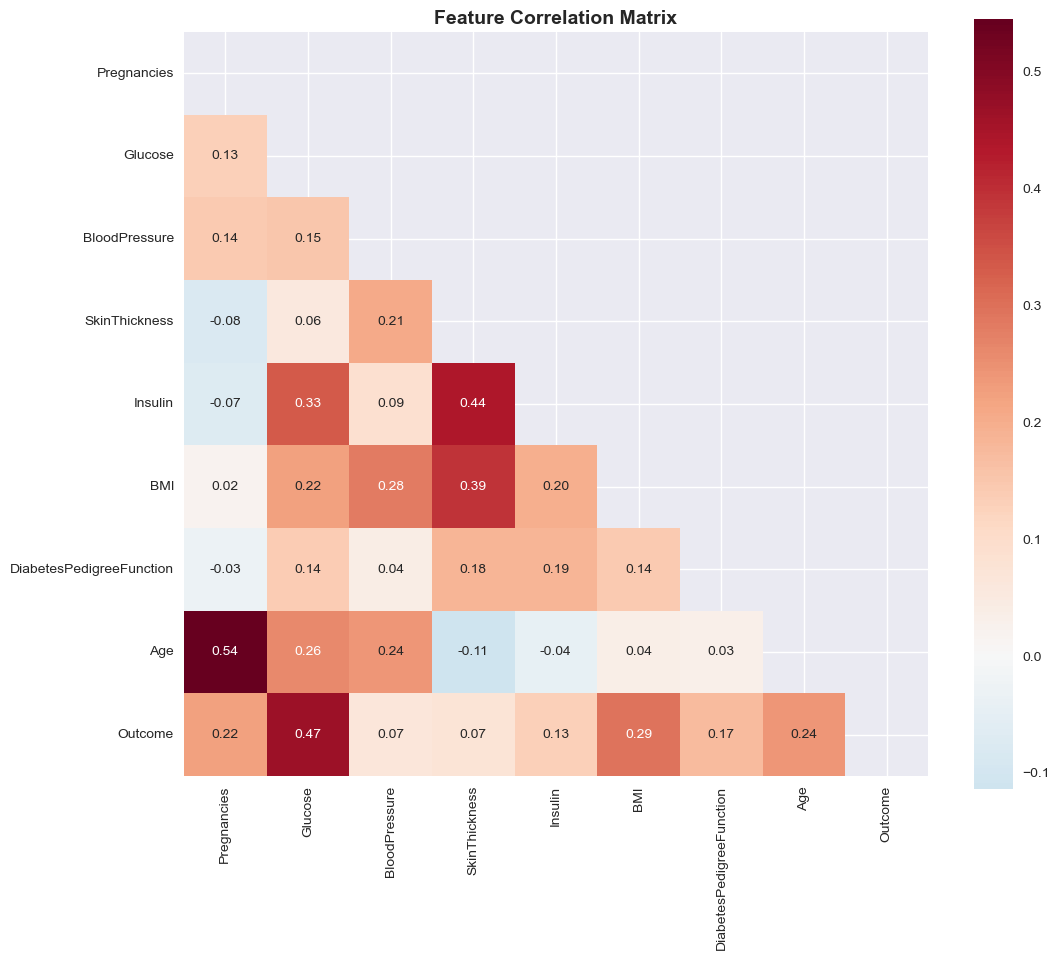

Correlation with Target Variable:
  Glucose: 0.467
  BMI: 0.293
  Age: 0.238
  Pregnancies: 0.222
  DiabetesPedigreeFunction: 0.174
  Insulin: 0.131
  SkinThickness: 0.075
  BloodPressure: 0.065


In [4]:
# ## 3. Exploratory Data Analysis {#exploratory-data-analysis}

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# ### Missing Values Check
print("🔍 Missing Values Check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

# ### Class Distribution (Target Variable)
print(f"\n🎯 Target Variable Distribution:")
target_counts = df['Outcome'].value_counts()
target_percentages = df['Outcome'].value_counts(normalize=True) * 100

print(f"Class 0 (No Diabetes): {target_counts[0]} samples ({target_percentages[0]:.1f}%)")
print(f"Class 1 (Diabetes): {target_counts[1]} samples ({target_percentages[1]:.1f}%)")

if abs(target_percentages[0] - target_percentages[1]) > 20:
    print("⚠️  Dataset is imbalanced - this will affect our evaluation metrics!")
else:
    print("✅ Dataset is relatively balanced")

# ### Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Target distribution
axes[0,0].pie(target_counts.values, labels=['No Diabetes', 'Diabetes'], 
              autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
axes[0,0].set_title('Target Variable Distribution')

# 2. Feature distributions by target
important_features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
for i, feature in enumerate(important_features[:3]):
    if i == 0:
        ax = axes[0,1]
    elif i == 1:
        ax = axes[1,0]
    else:
        ax = axes[1,1]
    
    df[df['Outcome']==0][feature].hist(alpha=0.7, bins=20, ax=ax, label='No Diabetes')
    df[df['Outcome']==1][feature].hist(alpha=0.7, bins=20, ax=ax, label='Diabetes')
    ax.set_title(f'{feature} Distribution by Outcome')
    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# ### Correlation Analysis
print(f"\n🔗 Correlation Analysis:")
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', 
            center=0, square=True, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

# Correlation with target
print("Correlation with Target Variable:")
target_corr = correlation_matrix['Outcome'].abs().sort_values(ascending=False)[1:]
for feature, corr in target_corr.items():
    print(f"  {feature}: {corr:.3f}")

In [5]:
# ## 4. Data Preprocessing {#data-preprocessing}

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# ### Train-Test Split

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("🎯 Splitting data into training and testing sets...")

# Split without stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Check class distribution in splits
train_dist = y_train.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100

print(f"\nClass distribution in training set:")
print(f"  No Diabetes: {train_dist[0]:.1f}%")
print(f"  Diabetes: {train_dist[1]:.1f}%")

print(f"Class distribution in test set:")
print(f"  No Diabetes: {test_dist[0]:.1f}%")
print(f"  Diabetes: {test_dist[1]:.1f}%")

# Split with stratify for comparison
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_strat_dist = y_train_strat.value_counts(normalize=True) * 100
test_strat_dist = y_test_strat.value_counts(normalize=True) * 100

print(f"\n✨ With Stratification:")
print(f"Training set - No Diabetes: {train_strat_dist[0]:.1f}%, Diabetes: {train_strat_dist[1]:.1f}%")
print(f"Test set - No Diabetes: {test_strat_dist[0]:.1f}%, Diabetes: {test_strat_dist[1]:.1f}%")

# Use stratified split for our models
X_train, X_test = X_train_strat, X_test_strat
y_train, y_test = y_train_strat, y_test_strat

# ### Feature Scaling

print(f"\n⚖️ Feature Scaling:")
print("Why scale features?")
print("- Some algorithms (like Logistic Regression, SVM, KNN) are sensitive to feature scales")
print("- Features with larger scales can dominate the learning process")
print("- Tree-based models (Random Forest, Decision Trees) are NOT affected by scaling")

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nBefore scaling - Training set statistics:")
print(f"Mean: {X_train.mean().round(2).values}")
print(f"Std:  {X_train.std().round(2).values}")

print(f"\nAfter scaling - Training set statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Std:  {X_train_scaled.std(axis=0).round(2)}")

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


DATA PREPROCESSING
🎯 Splitting data into training and testing sets...
Training set size: 614 samples
Testing set size: 154 samples

Class distribution in training set:
  No Diabetes: 65.3%
  Diabetes: 34.7%
Class distribution in test set:
  No Diabetes: 64.3%
  Diabetes: 35.7%

✨ With Stratification:
Training set - No Diabetes: 65.1%, Diabetes: 34.9%
Test set - No Diabetes: 64.9%, Diabetes: 35.1%

⚖️ Feature Scaling:
Why scale features?
- Some algorithms (like Logistic Regression, SVM, KNN) are sensitive to feature scales
- Features with larger scales can dominate the learning process
- Tree-based models (Random Forest, Decision Trees) are NOT affected by scaling

Before scaling - Training set statistics:
Mean: [  3.82 120.91  69.44  20.78  78.67  31.97   0.48  33.37]
Std:  [  3.31  31.56  18.4   15.86 107.74   7.86   0.33  11.83]

After scaling - Training set statistics:
Mean: [-0.  0. -0. -0. -0.  0. -0. -0.]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
# ## 5. Modeling {#modeling}

print("\n" + "="*50)
print("MODELING")
print("="*50)

# ### Model 1: Logistic Regression (Linear Model)
print("🤖 Model 1: Logistic Regression")
print("Characteristics:")
print("- Linear model that uses sigmoid function")
print("- Requires feature scaling")
print("- Provides probability estimates")
print("- Interpretable coefficients")

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("✅ Logistic Regression trained successfully!")

# ### Model 2: Random Forest (Tree-based Model)
print(f"\n🌲 Model 2: Random Forest")
print("Characteristics:")
print("- Ensemble of decision trees")
print("- Does NOT require feature scaling")
print("- Handles non-linear relationships")
print("- Provides feature importance")
print("- Less interpretable than linear models")

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Note: using unscaled data

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

print("✅ Random Forest trained successfully!")


MODELING
🤖 Model 1: Logistic Regression
Characteristics:
- Linear model that uses sigmoid function
- Requires feature scaling
- Provides probability estimates
- Interpretable coefficients
✅ Logistic Regression trained successfully!

🌲 Model 2: Random Forest
Characteristics:
- Ensemble of decision trees
- Does NOT require feature scaling
- Handles non-linear relationships
- Provides feature importance
- Less interpretable than linear models
✅ Random Forest trained successfully!



EVALUATION METRICS

📊 Logistic Regression Performance:
----------------------------------------
Accuracy:  0.7143
Precision: 0.6087
Recall:    0.5185
F1-Score:  0.5600
AUC-ROC:   0.8230

📊 Random Forest Performance:
----------------------------------------
Accuracy:  0.7597
Precision: 0.6809
Recall:    0.5926
F1-Score:  0.6337
AUC-ROC:   0.8118

UNDERSTANDING EVALUATION METRICS

🎯 ACCURACY = (TP + TN) / (TP + TN + FP + FN)
   - Percentage of correct predictions
   - Good for balanced datasets
   - Can be misleading with imbalanced data

🎯 PRECISION = TP / (TP + FP)
   - Of all positive predictions, how many were actually positive?
   - Important when False Positives are costly
   - "How precise are our positive predictions?"

🎯 RECALL (Sensitivity) = TP / (TP + FN)
   - Of all actual positives, how many did we correctly identify?
   - Important when False Negatives are costly
   - "How many actual positives did we catch?"

🎯 F1-SCORE = 2 * (Precision * Recall) / (Precision + Recall)
 

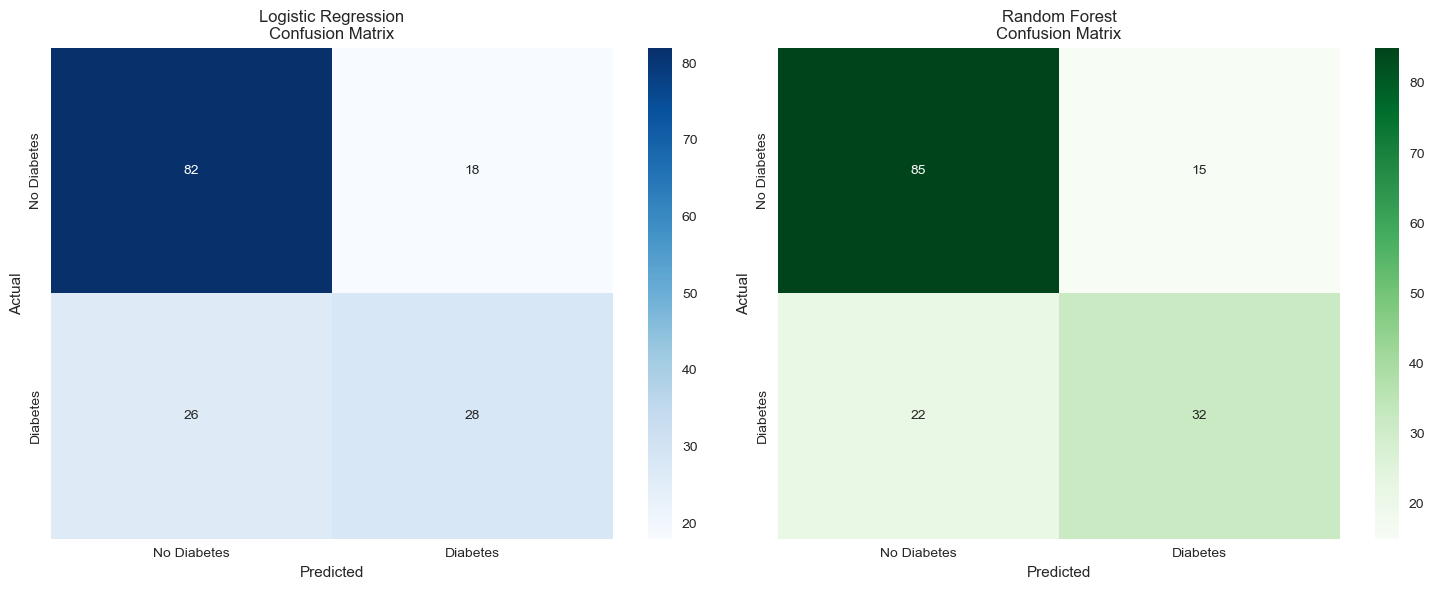

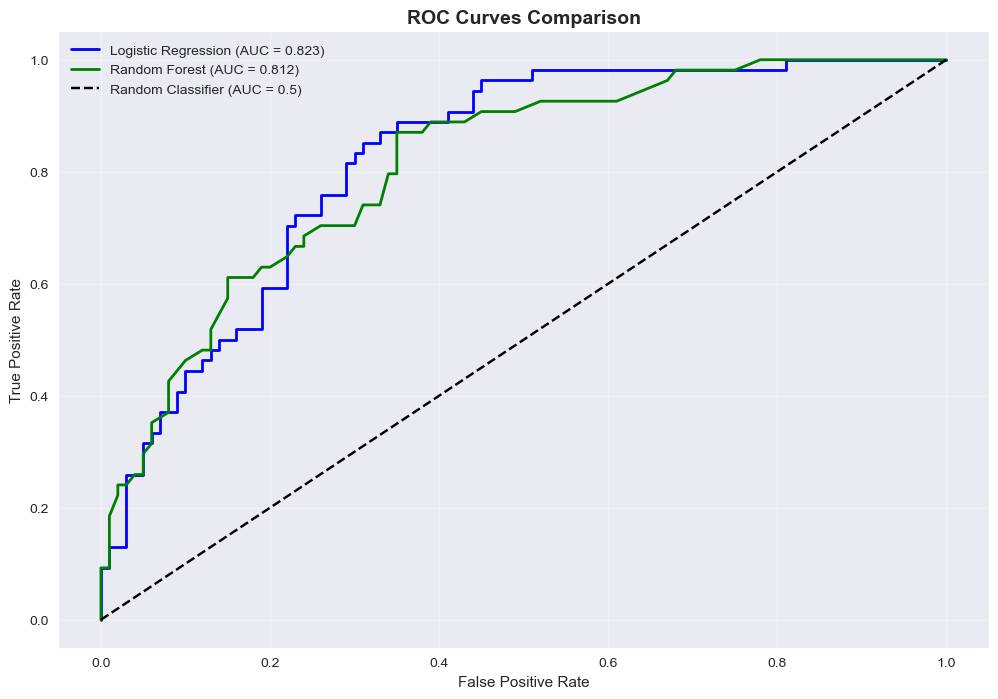


⚠️  WHY ACCURACY ALONE ISN'T ENOUGH:

Consider a dataset with 95% negative samples and 5% positive samples.
A model that always predicts "negative" would have 95% accuracy!
But it would be useless for identifying positive cases.

This is why we need:
- Precision: To avoid too many false alarms
- Recall: To catch actual positive cases
- F1-Score: To balance both precision and recall
- AUC: To measure overall discriminative ability

Our dataset has 65.1% negative and 34.9% positive samples.



In [7]:
# ## 6. Evaluation Metrics {#evaluation-metrics}

print("\n" + "="*50)
print("EVALUATION METRICS")
print("="*50)

def evaluate_model(y_true, y_pred, y_proba, model_name):
    """
    Comprehensive model evaluation function
    """
    print(f"\n📊 {model_name} Performance:")
    print("-" * 40)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }

# Evaluate both models
lr_metrics = evaluate_model(y_test, lr_test_pred, lr_test_proba, "Logistic Regression")
rf_metrics = evaluate_model(y_test, rf_test_pred, rf_test_proba, "Random Forest")

# ### Understanding Evaluation Metrics

print(f"\n" + "="*60)
print("UNDERSTANDING EVALUATION METRICS")
print("="*60)

print("""
🎯 ACCURACY = (TP + TN) / (TP + TN + FP + FN)
   - Percentage of correct predictions
   - Good for balanced datasets
   - Can be misleading with imbalanced data

🎯 PRECISION = TP / (TP + FP)
   - Of all positive predictions, how many were actually positive?
   - Important when False Positives are costly
   - "How precise are our positive predictions?"

🎯 RECALL (Sensitivity) = TP / (TP + FN)
   - Of all actual positives, how many did we correctly identify?
   - Important when False Negatives are costly
   - "How many actual positives did we catch?"

🎯 F1-SCORE = 2 * (Precision * Recall) / (Precision + Recall)
   - Harmonic mean of precision and recall
   - Good for imbalanced datasets
   - Balances both precision and recall

🎯 AUC-ROC = Area Under the ROC Curve
   - Measures model's ability to distinguish between classes
   - Range: 0.5 (random) to 1.0 (perfect)
   - Higher is better

Where:
- TP = True Positives
- TN = True Negatives  
- FP = False Positives
- FN = False Negatives
""")

# ### Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[0], cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[1], cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[1].set_title('Random Forest\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ### ROC Curves
plt.figure(figsize=(12, 8))

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_proba)

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_metrics["auc"]:.3f})', 
         linewidth=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["auc"]:.3f})', 
         linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ### Why Accuracy Alone Isn't Enough
print(f"\n⚠️  WHY ACCURACY ALONE ISN'T ENOUGH:")
print(f"""
Consider a dataset with 95% negative samples and 5% positive samples.
A model that always predicts "negative" would have 95% accuracy!
But it would be useless for identifying positive cases.

This is why we need:
- Precision: To avoid too many false alarms
- Recall: To catch actual positive cases
- F1-Score: To balance both precision and recall
- AUC: To measure overall discriminative ability

Our dataset has {(1-y.mean())*100:.1f}% negative and {y.mean()*100:.1f}% positive samples.
""")


MODEL INTERPRETABILITY
🌲 Random Forest Feature Importance:
                    feature  importance
1                   Glucose    0.276009
5                       BMI    0.159544
7                       Age    0.127248
6  DiabetesPedigreeFunction    0.126731
2             BloodPressure    0.085606
0               Pregnancies    0.084456
4                   Insulin    0.072409
3             SkinThickness    0.067997


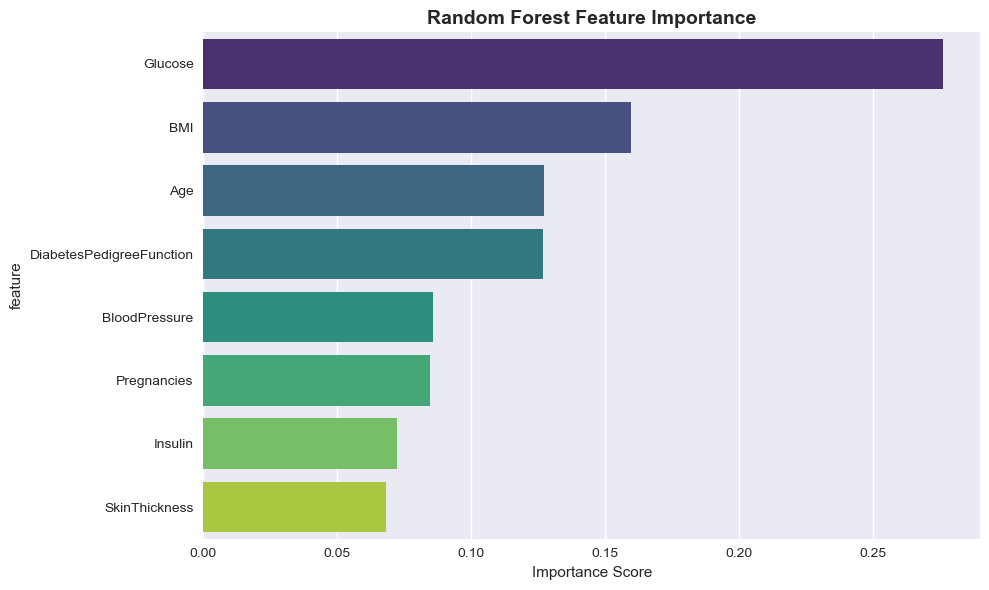


📊 Logistic Regression Coefficients:
                    feature  coefficient
1                   Glucose     1.144151
5                       BMI     0.713893
0               Pregnancies     0.373178
6  DiabetesPedigreeFunction     0.255527
2             BloodPressure    -0.197637
7                       Age     0.184179
4                   Insulin    -0.127308
3             SkinThickness     0.066535

🔍 Coefficient Interpretation:
- Positive coefficient: Higher feature value → Higher probability of diabetes
- Negative coefficient: Higher feature value → Lower probability of diabetes
- Larger absolute value: Stronger influence on prediction



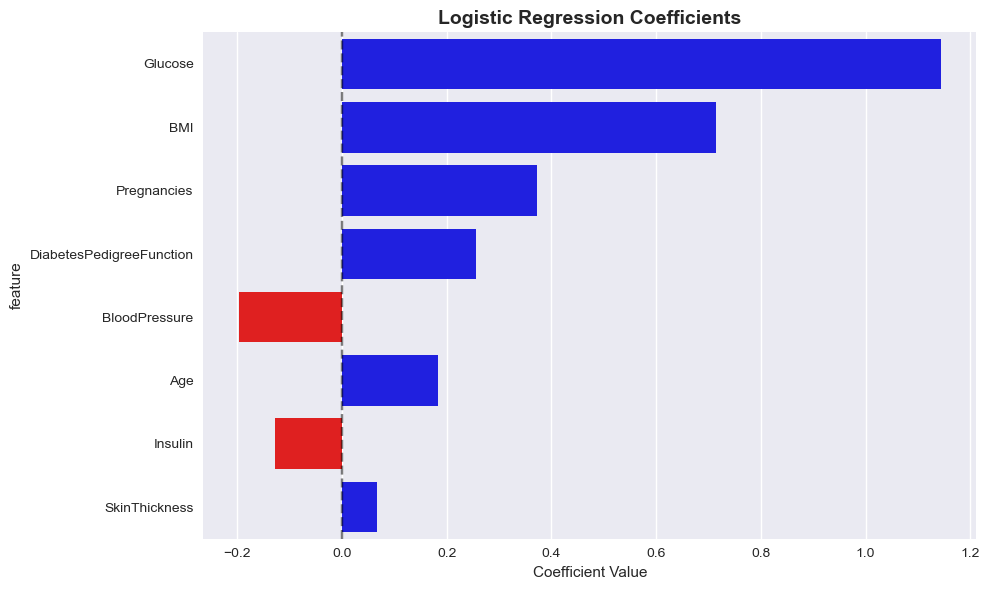

In [8]:
# ## 7. Model Interpretability {#model-interpretability}

print("\n" + "="*50)
print("MODEL INTERPRETABILITY")
print("="*50)

# ### Feature Importance (Random Forest)
print("🌲 Random Forest Feature Importance:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# ### Coefficient Interpretation (Logistic Regression)
print(f"\n📊 Logistic Regression Coefficients:")
lr_coef = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print(lr_coef)

print(f"""
🔍 Coefficient Interpretation:
- Positive coefficient: Higher feature value → Higher probability of diabetes
- Negative coefficient: Higher feature value → Lower probability of diabetes
- Larger absolute value: Stronger influence on prediction
""")

# Plot coefficients
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in lr_coef['coefficient']]
sns.barplot(data=lr_coef, x='coefficient', y='feature', palette=colors)
plt.title('Logistic Regression Coefficients', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
# ## 8. Interview Preparation {#interview-preparation}

print("\n" + "="*60)
print("INTERVIEW PREPARATION - COMMON QUESTIONS")
print("="*60)

interview_questions = {
    "What's the difference between Precision and Recall?": """
    PRECISION: Of all positive predictions, how many were actually correct?
    - Formula: TP/(TP+FP)
    - Use when: False positives are costly (e.g., spam detection)
    
    RECALL: Of all actual positives, how many did we correctly identify?
    - Formula: TP/(TP+FN)  
    - Use when: False negatives are costly (e.g., disease diagnosis)
    """,
    
    "When is F1-score better than Accuracy?": """
    F1-SCORE is better when:
    - Dataset is imbalanced
    - You need to balance precision and recall
    - Both false positives and false negatives are important
    
    ACCURACY can be misleading with imbalanced data because a model
    that always predicts the majority class can have high accuracy
    but zero utility.
    """,
    
    "What is AUC and how to interpret it?": """
    AUC (Area Under the ROC Curve):
    - Measures model's ability to distinguish between classes
    - Range: 0.5 (random guessing) to 1.0 (perfect classification)
    - 0.9-1.0: Excellent
    - 0.8-0.9: Good  
    - 0.7-0.8: Fair
    - 0.6-0.7: Poor
    - 0.5-0.6: Fail
    
    AUC is threshold-independent - it measures quality across all thresholds.
    """,
    
    "Why do we need train-test split?": """
    TRAIN-TEST SPLIT prevents overfitting by:
    - Training model on one subset of data
    - Evaluating on unseen data
    - Estimating real-world performance
    
    Without it, we'd have overly optimistic performance estimates
    that don't generalize to new data.
    """,
    
    "When do you need feature scaling?": """
    FEATURE SCALING is needed for:
    - Distance-based algorithms (KNN, K-means, SVM)
    - Gradient-based algorithms (Logistic Regression, Neural Networks)
    - Algorithms with regularization (Ridge, Lasso)
    
    NOT needed for:
    - Tree-based algorithms (Random Forest, Decision Trees, XGBoost)
    - Naive Bayes
    
    Reason: Tree algorithms make splits based on individual features,
    not distances between data points.
    """,
    
    "How do you handle imbalanced datasets?": """
    TECHNIQUES for imbalanced data:
    1. Resampling: SMOTE, undersampling, oversampling
    2. Class weights: Penalize minority class mistakes more
    3. Different metrics: Use F1, AUC instead of accuracy
    4. Ensemble methods: Random Forest often handles imbalance well
    5. Anomaly detection: Treat majority class as normal, minority as anomaly
    """,
    
    "What's the difference between Type I and Type II errors?": """
    TYPE I ERROR (False Positive):
    - Rejecting a true null hypothesis
    - "False alarm"
    - Related to Precision (lower precision = more Type I errors)
    
    TYPE II ERROR (False Negative):
    - Accepting a false null hypothesis  
    - "Missing the signal"
    - Related to Recall (lower recall = more Type II errors)
    
    In medical diagnosis:
    - Type I: Healthy person diagnosed as sick
    - Type II: Sick person diagnosed as healthy
    """
}

for question, answer in interview_questions.items():
    print(f"\n❓ {question}")
    print(f"💡 {answer}")


INTERVIEW PREPARATION - COMMON QUESTIONS

❓ What's the difference between Precision and Recall?
💡 
    PRECISION: Of all positive predictions, how many were actually correct?
    - Formula: TP/(TP+FP)
    - Use when: False positives are costly (e.g., spam detection)
    
    RECALL: Of all actual positives, how many did we correctly identify?
    - Formula: TP/(TP+FN)  
    - Use when: False negatives are costly (e.g., disease diagnosis)
    

❓ When is F1-score better than Accuracy?
💡 
    F1-SCORE is better when:
    - Dataset is imbalanced
    - You need to balance precision and recall
    - Both false positives and false negatives are important
    
    ACCURACY can be misleading with imbalanced data because a model
    that always predicts the majority class can have high accuracy
    but zero utility.
    

❓ What is AUC and how to interpret it?
💡 
    AUC (Area Under the ROC Curve):
    - Measures model's ability to distinguish between classes
    - Range: 0.5 (random guessing)

In [10]:
# ## 9. Wrap-up {#wrap-up}

print("\n" + "="*50)
print("PROJECT SUMMARY")
print("="*50)

# Model comparison
print("🏆 MODEL COMPARISON:")
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Logistic Regression': [lr_metrics['accuracy'], lr_metrics['precision'], 
                           lr_metrics['recall'], lr_metrics['f1'], lr_metrics['auc']],
    'Random Forest': [rf_metrics['accuracy'], rf_metrics['precision'],
                     rf_metrics['recall'], rf_metrics['f1'], rf_metrics['auc']]
})

print(comparison_df.round(4))

# Determine best model
best_model = "Random Forest" if rf_metrics['f1'] > lr_metrics['f1'] else "Logistic Regression"
print(f"\n🥇 Best Model (based on F1-Score): {best_model}")

print(f"""
📋 WHAT WE ACCOMPLISHED:
✅ Loaded and explored the Pima Indians Diabetes dataset
✅ Performed comprehensive EDA with visualizations
✅ Applied proper train-test split with stratification
✅ Implemented feature scaling (and explained when it's needed)
✅ Trained two different types of models (linear vs tree-based)
✅ Evaluated models using multiple metrics
✅ Visualized results with confusion matrices and ROC curves
✅ Interpreted model results and feature importance
✅ Prepared answers for common interview questions

🚀 FOR REAL-WORLD PROJECTS, YOU WOULD ALSO:
- Cross-validation for more robust evaluation
- Hyperparameter tuning (GridSearch, RandomSearch)
- Feature engineering and selection
- Handle missing values and outliers
- Try more models (XGBoost, SVM, Neural Networks)
- Ensemble methods
- Pipeline creation for reproducibility
- Model deployment considerations

🎯 KEY TAKEAWAYS:
1. Always start with EDA to understand your data
2. Choose evaluation metrics appropriate for your problem
3. Don't rely on accuracy alone, especially for imbalanced data
4. Understand why and when to scale features
5. Model interpretability is often as important as performance
6. Always validate on unseen data

Remember: The best model isn't always the most complex one.
Sometimes a simple, interpretable model is more valuable than
a black-box model with slightly better performance.
""")

print("\n🎉 Classification project complete! You're ready for those interviews!")


PROJECT SUMMARY
🏆 MODEL COMPARISON:
      Metric  Logistic Regression  Random Forest
0   Accuracy               0.7143         0.7597
1  Precision               0.6087         0.6809
2     Recall               0.5185         0.5926
3   F1-Score               0.5600         0.6337
4        AUC               0.8230         0.8118

🥇 Best Model (based on F1-Score): Random Forest

📋 WHAT WE ACCOMPLISHED:
✅ Loaded and explored the Pima Indians Diabetes dataset
✅ Performed comprehensive EDA with visualizations
✅ Applied proper train-test split with stratification
✅ Implemented feature scaling (and explained when it's needed)
✅ Trained two different types of models (linear vs tree-based)
✅ Evaluated models using multiple metrics
✅ Visualized results with confusion matrices and ROC curves
✅ Interpreted model results and feature importance
✅ Prepared answers for common interview questions

🚀 FOR REAL-WORLD PROJECTS, YOU WOULD ALSO:
- Cross-validation for more robust evaluation
- Hyperparameter